In [129]:
#%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Plot Mosfet current imbalance
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import style

In [130]:
#System variables and values

#Number of Mosfet
N = 2
#Balance current
IB = 82
#R2−25 = 3.3mΩRDS−ON for MOSFET 2 at25$^{\circ}$C
R2_25 = 3.3
#R1−25 = 4.1mΩRDS−ON for MOSFET 1 at25degC
R1_25 = 4.1
#θJA = 3.50C/W junction to ambient thermal resistance
Delta_JA = 43
#K = 0.00644per unit change inRDS−ON/0C
K = 0.00644
#δT2JA = R2−25IB2 θJAK
DT2JA = R2_25 * (IB**2) * Delta_JA * K * (1/1000)
print("DT2JA = ", DT2JA)

#DT2JA
#TJ-25 Max - 4.1, Typ = 3.3mΩ

DT2JA =  6.144633263999999


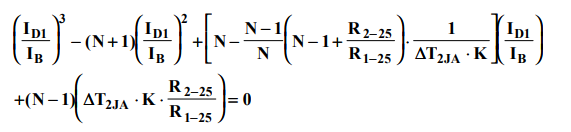

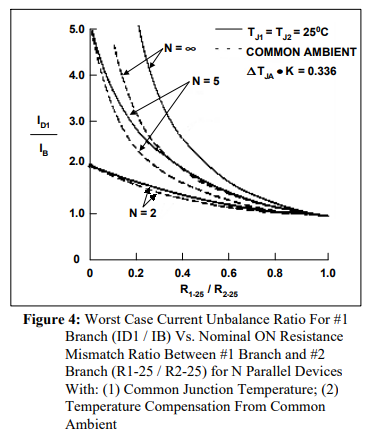

In [131]:
#Solving polynomial equation for a given range of values
#p(x) = Ax^3 + Bx^2 + Cx^1 + D 
#x = R1_25/R2_25
#y = (ID1/IB)

y_list = []
y2_list = []
y3_list = []
x_list = []

C_list = []
D_list = []

root1_list = []
root2_list = []
root3_list = []

#co-efficient calculation
A = 1
B = -(N+1)
#This value is hard coded for testing
#TODO-This has to be calculated from the datasheet values
δT2JA = 1.2 #2.2

#Value of R1-25/R2-25
xx = np.linspace(0.8, 1.0, 100, endpoint=True)

for eachx in xx:
    #compute polynomial values using constant range
    C = (N - (((N-1)/N)*(N-1+(1/eachx))*(1/δT2JA)))
    D = ((N-1)*(δT2JA/eachx))
    
    #frame polynomial
    coeff2 = [A, B, C, D]
    #For debugging and understanding
    C_list.append(C)
    D_list.append(D)
    
    imbalance_current2 = np.poly1d(coeff2, variable = '(ID1/IB)')
    
    #create list
    x_list.append(eachx)
    #Finding roots of polynomial and add the real number
    y_list.append(imbalance_current2.r[0].real)
    y2_list.append(imbalance_current2.r[1].real)
    y3_list.append(imbalance_current2.r[2].real)
    
    #for debugging and analysis
    root1_list.append(imbalance_current2.r[0])
    root2_list.append(imbalance_current2.r[1])
    root3_list.append(imbalance_current2.r[2])
    
    #print ("Roots of imbalance_current polynomial : ", eachx, " - ",imbalance_current2.order, imbalance_current2.r)



<Figure size 432x288 with 0 Axes>

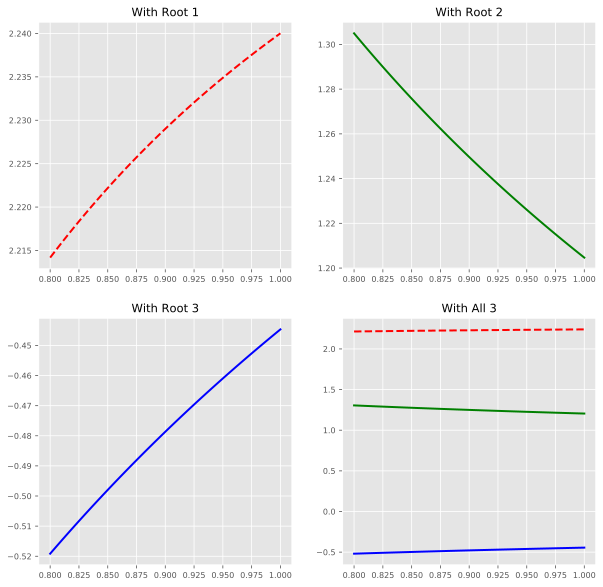

In [132]:
#plot data in matplotlib  
style.use('ggplot')
plt.subplots_adjust(hspace=0.5)
#plt.subplots_adjust(vspace=0.5)

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 8})
plt.title("Worst Case Current Unbalance Ratio For #1 Branch (ID1 / IB) Vs. Nominal ON Resistance")
plt.ylabel('ID1/IB')
plt.xlabel('R1-25/R2-25')
#method#1
plt.subplot(2,2,1)
plt.title("With Root 1")
#plt.plot(x_list, y_list, color='m', label='root1', linewidth=2, animated=False, marker='1', linestyle = '--')
plt.plot(x_list, y_list, color='r', label='root1', linewidth=2, linestyle = '--')
plt.subplot(2,2,2)
plt.title("With Root 2")
plt.plot(x_list, y2_list, color='g', label='root1', linewidth=2, linestyle = '-')
plt.subplot(2,2,3)
plt.title("With Root 3")
plt.plot(x_list, y3_list, color='b', label='root1', linewidth=2, linestyle = '-')
plt.subplot(2,2,4)
plt.title("With All 3")
plt.plot(x_list, y_list, color='r', label='root1', linewidth=2, linestyle = '--')
plt.plot(x_list, y2_list, color='g', label='root1', linewidth=2, linestyle = '-')
plt.plot(x_list, y3_list, color='b', label='root1', linewidth=2, linestyle = '-')
